In [3]:
# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 2. Load dataset
df = pd.read_excel("C:/Users/Priyanka/Downloads/ClusteringGlobal/World_development_mesurement.xlsx")

print("Shape:", df.shape)
df.head()


Shape: (2704, 25)


Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [5]:
# 3. Remove '$' and ',' and convert to numeric
money_cols = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound"]

for col in money_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Business Tax Rate also has %
df["Business Tax Rate"] = (
    df["Business Tax Rate"]
    .astype(str)
    .str.replace("%", "", regex=False)
)

df["Business Tax Rate"] = pd.to_numeric(df["Business Tax Rate"], errors="coerce")


In [7]:
# 4. Remove duplicate rows
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


In [9]:
# 5. Separate columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

num_cols, cat_cols

(['Birth Rate',
  'Business Tax Rate',
  'CO2 Emissions',
  'Days to Start Business',
  'Ease of Business',
  'Energy Usage',
  'GDP',
  'Health Exp % GDP',
  'Health Exp/Capita',
  'Hours to do Tax',
  'Infant Mortality Rate',
  'Internet Usage',
  'Lending Interest',
  'Life Expectancy Female',
  'Life Expectancy Male',
  'Mobile Phone Usage',
  'Number of Records',
  'Population 0-14',
  'Population 15-64',
  'Population 65+',
  'Population Total',
  'Population Urban',
  'Tourism Inbound',
  'Tourism Outbound'],
 ['Country'])

In [11]:
# 6. Missing value imputation
# Numeric columns
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical columns (like Country)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [13]:
# 7. Outlier Treatment (Cap)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

In [15]:
# 8. Scaling numeric columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [29]:
import missingno as msno
import matplotlib.pyplot as plt

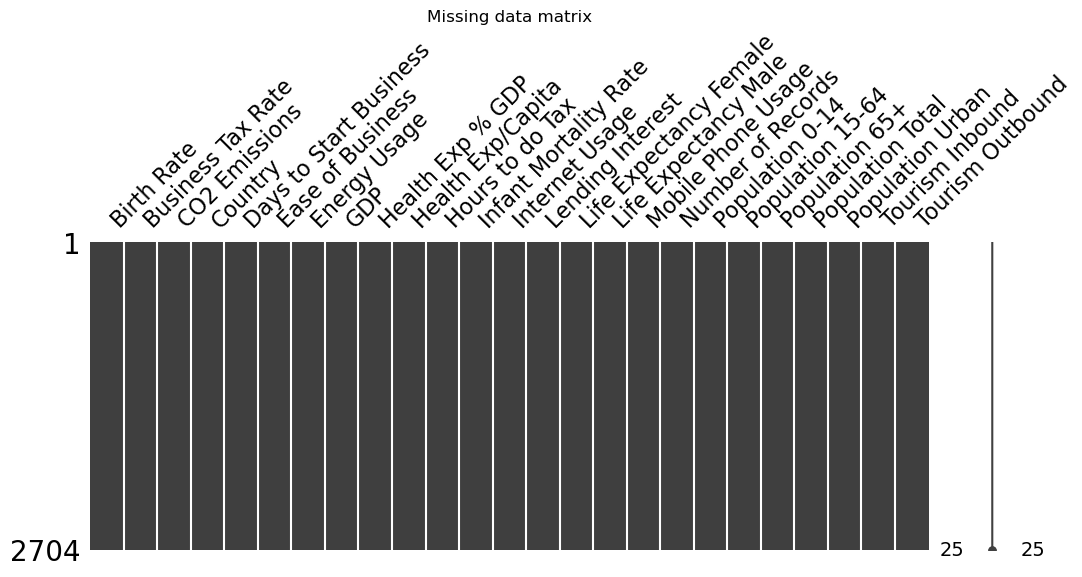

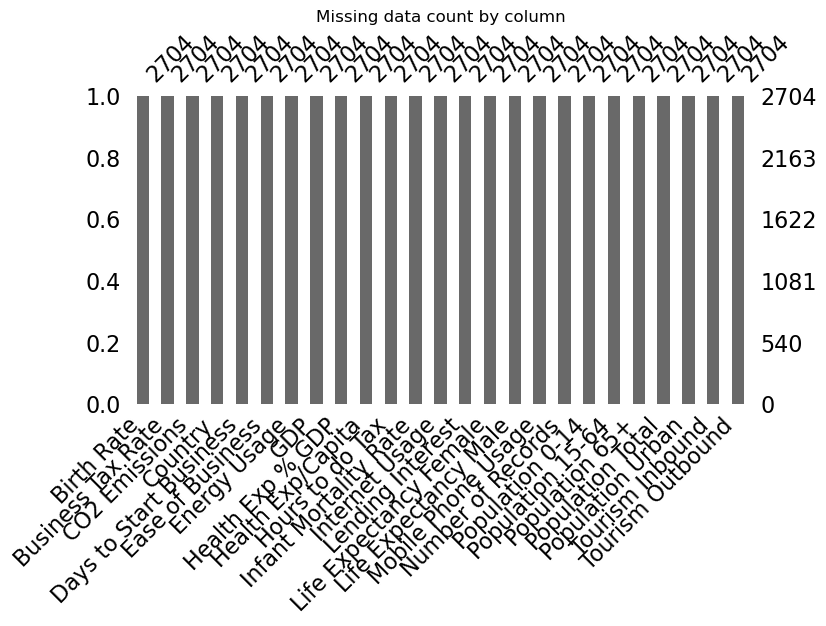


Duplicate rows count: 0


In [35]:
# Visualize missingness (if many columns, this can be long)
msno.matrix(df, figsize=(12,4))
plt.title('Missing data matrix')
plt.show()

msno.bar(df, figsize=(8,4))
plt.title('Missing data count by column')
plt.show()

# Duplicates
dups = df.duplicated().sum()
print('\nDuplicate rows count:', dups)

In [17]:
# 9. Save cleaned data
df.to_csv("cleaned_data.csv", index=False)
df_scaled.to_csv("cleaned_scaled_data.csv", index=False)

print("Cleaning Complete!")
print("Saved: cleaned_data.csv")
print("Saved: cleaned_scaled_data.csv")

Cleaning Complete!
Saved: cleaned_data.csv
Saved: cleaned_scaled_data.csv


In [19]:
df_clean = pd.read_csv("cleaned_data.csv")
df_clean.shape
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   Business Tax Rate       2704 non-null   float64
 2   CO2 Emissions           2704 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  2704 non-null   float64
 5   Ease of Business        2704 non-null   float64
 6   Energy Usage            2704 non-null   float64
 7   GDP                     2704 non-null   float64
 8   Health Exp % GDP        2704 non-null   float64
 9   Health Exp/Capita       2704 non-null   float64
 10  Hours to do Tax         2704 non-null   float64
 11  Infant Mortality Rate   2704 non-null   float64
 12  Internet Usage          2704 non-null   float64
 13  Lending Interest        2704 non-null   float64
 14  Life Expectancy Female  2704 non-null   

In [39]:
import seaborn as sns

Numeric columns: ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']


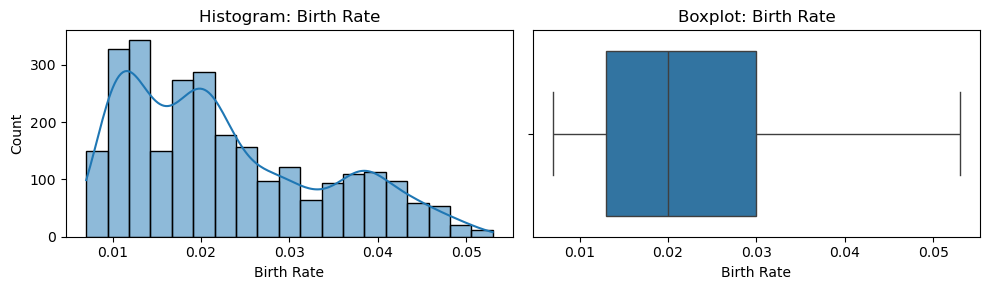

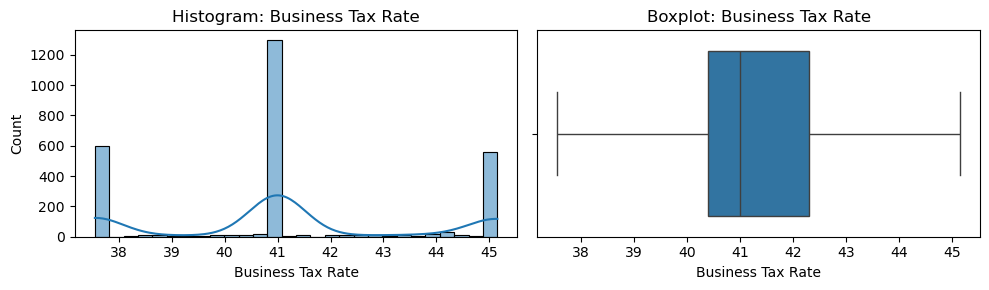

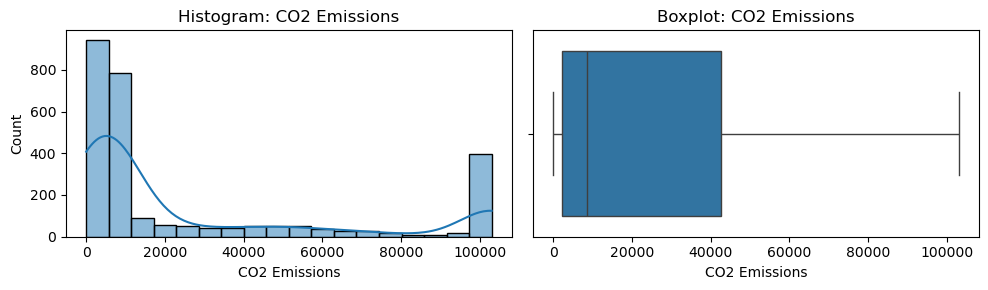

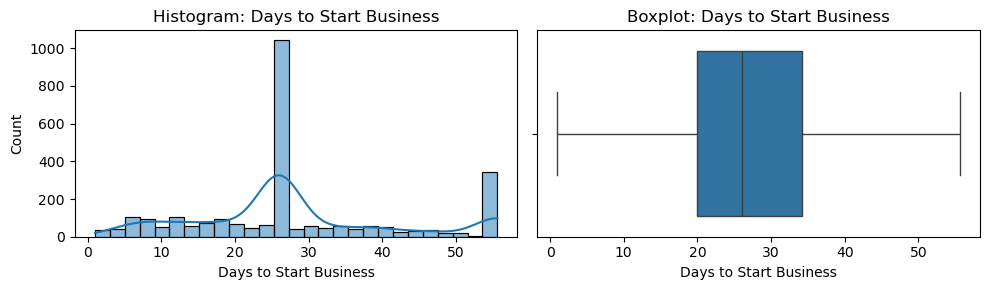

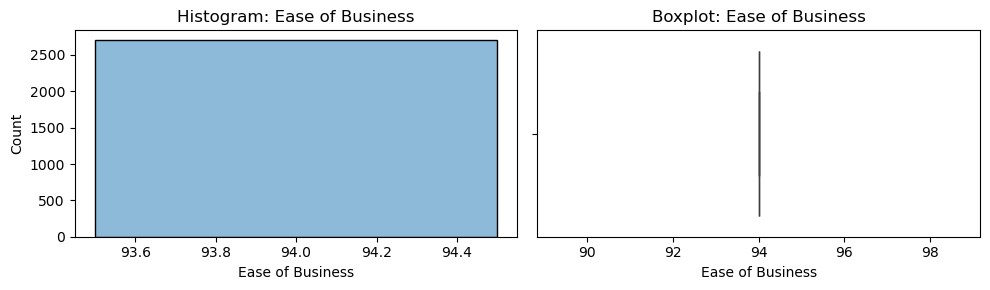

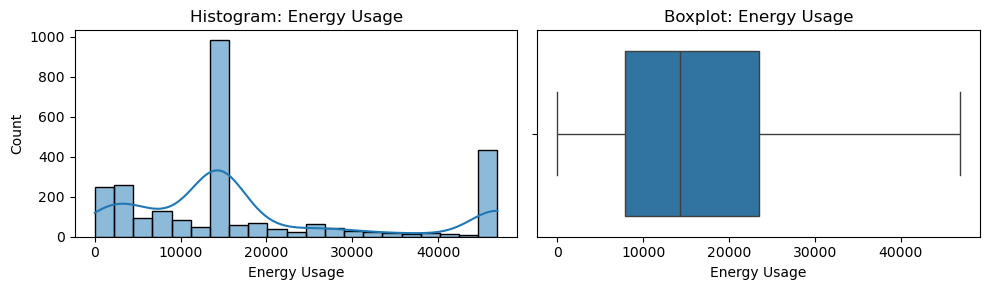

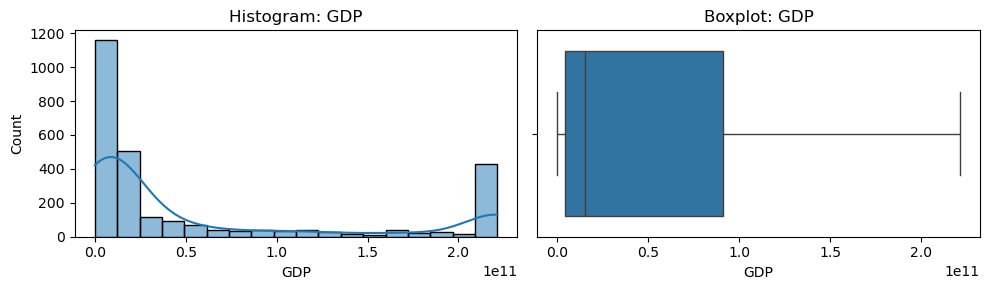

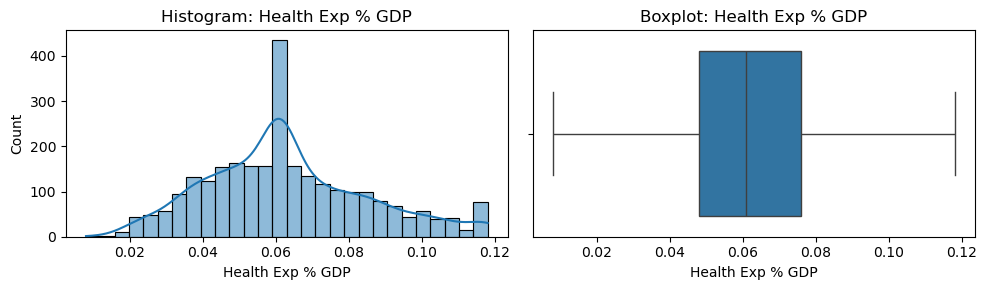

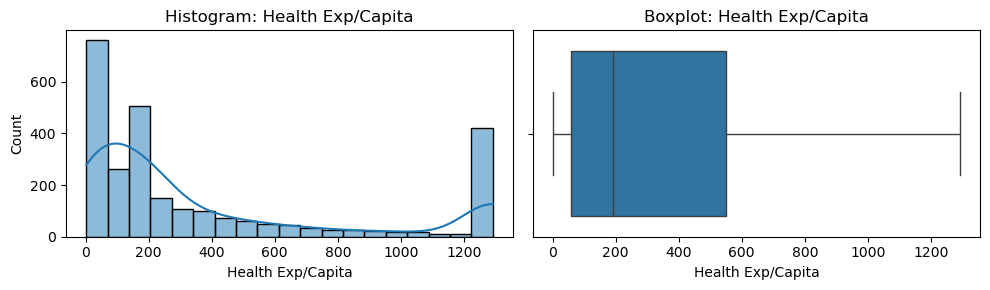

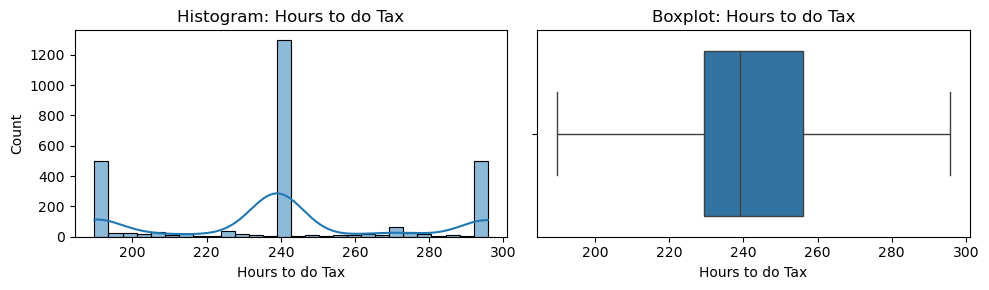

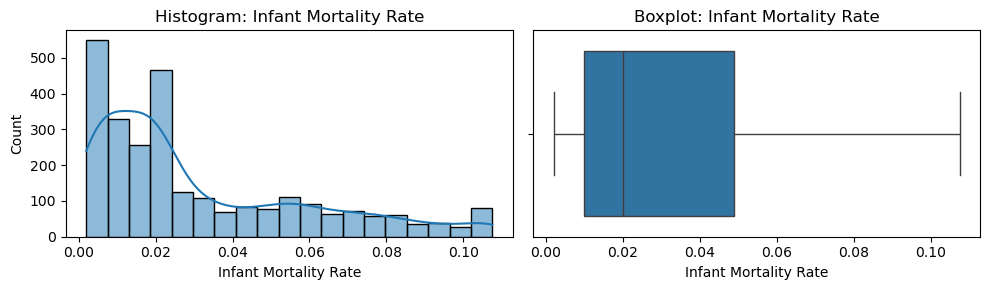

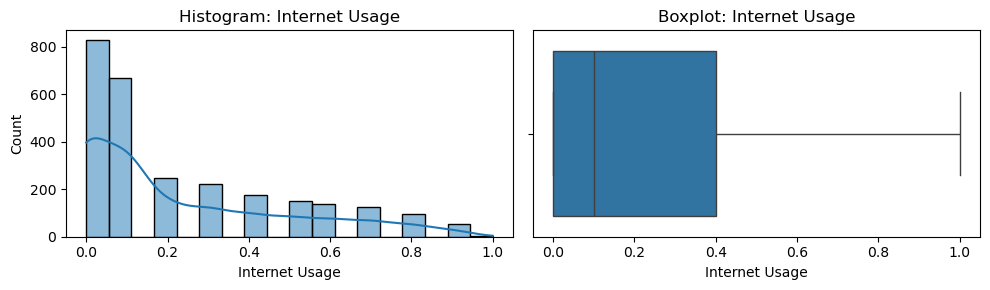

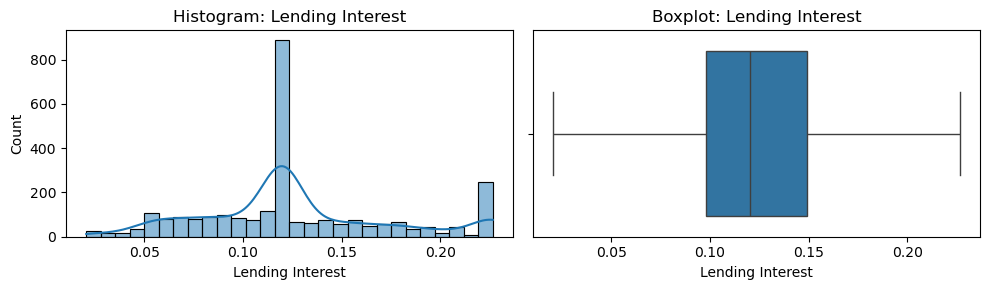

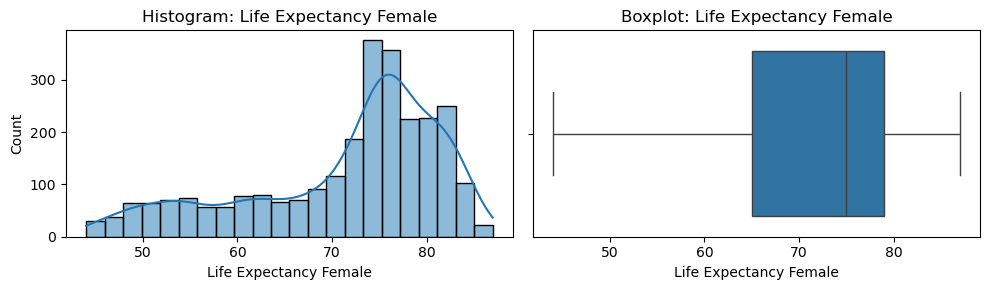

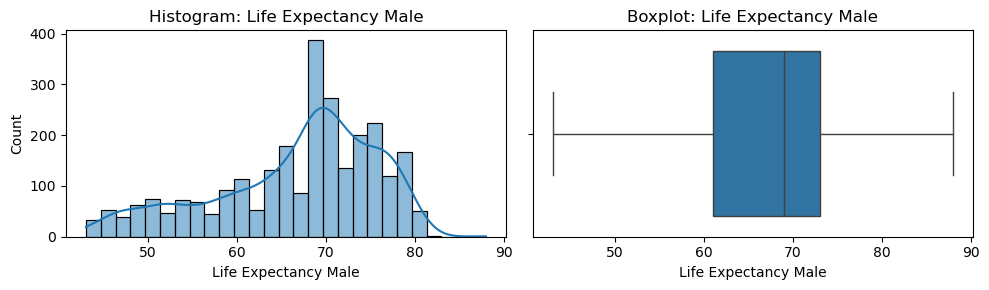

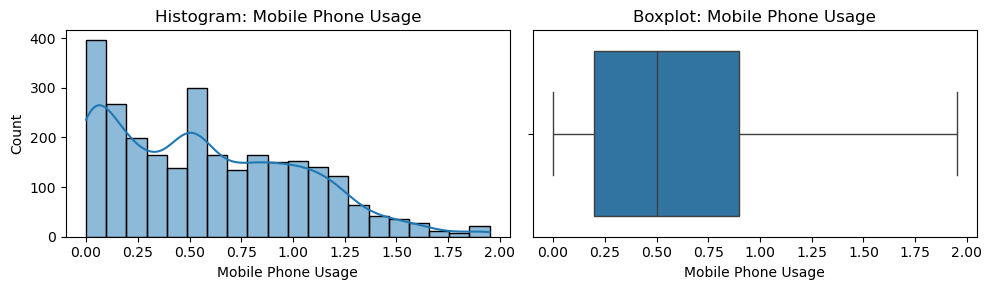

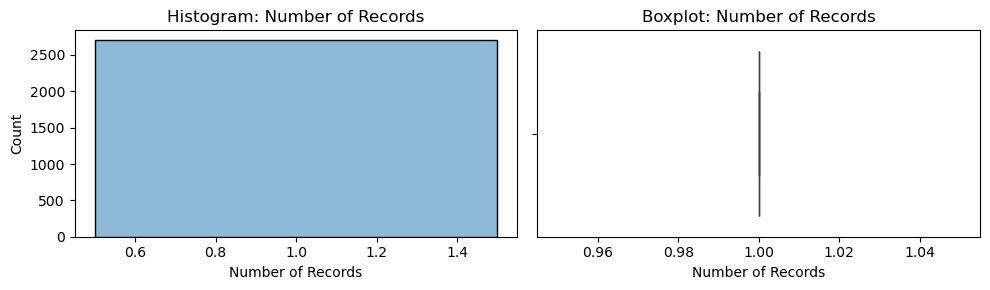

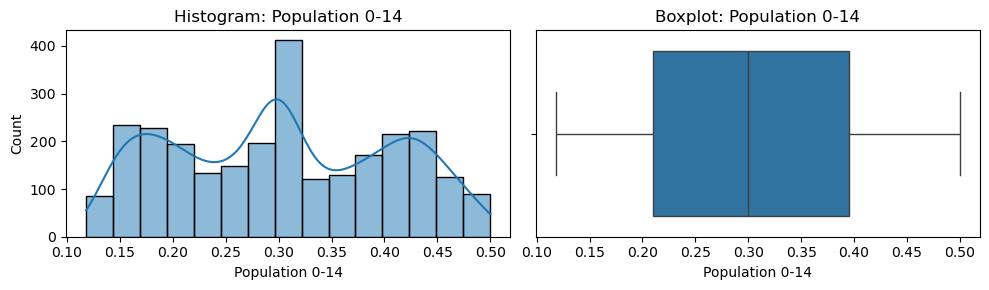

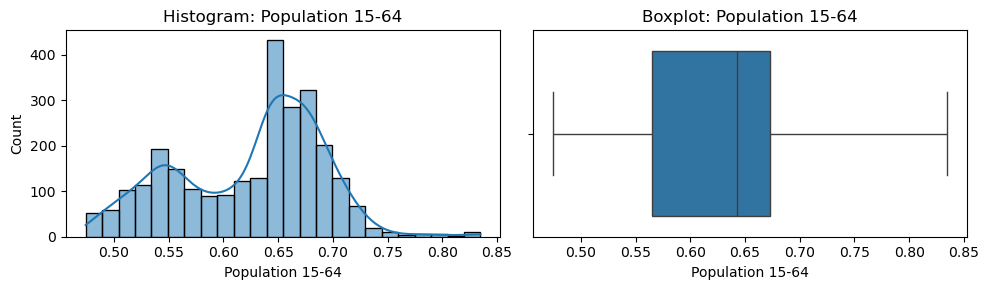

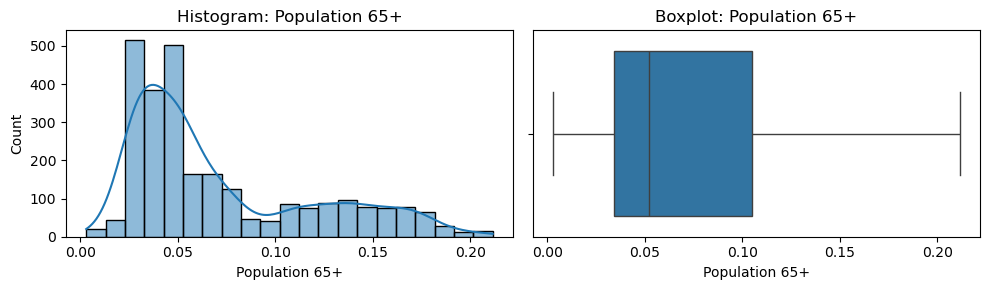

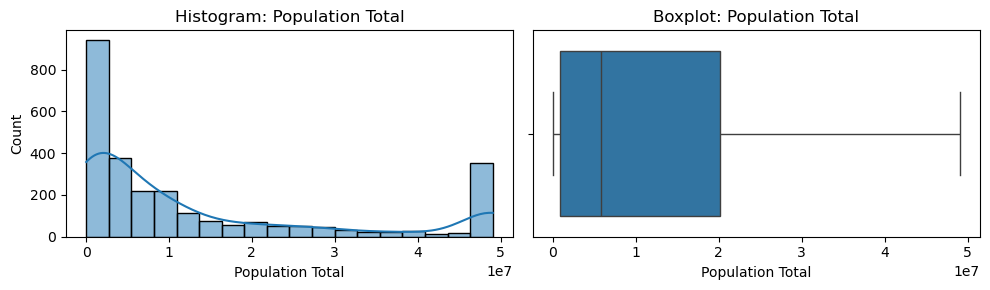

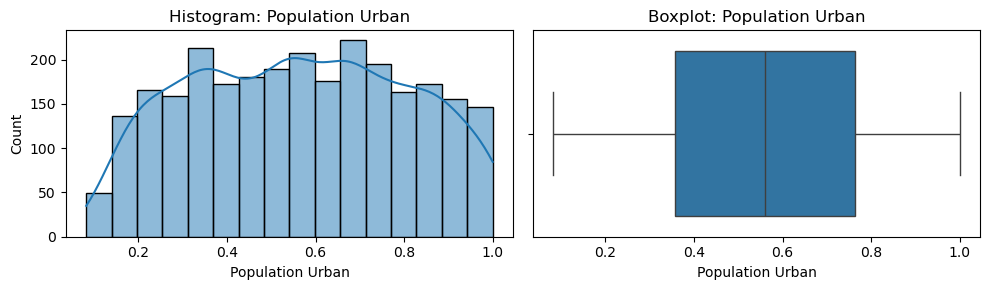

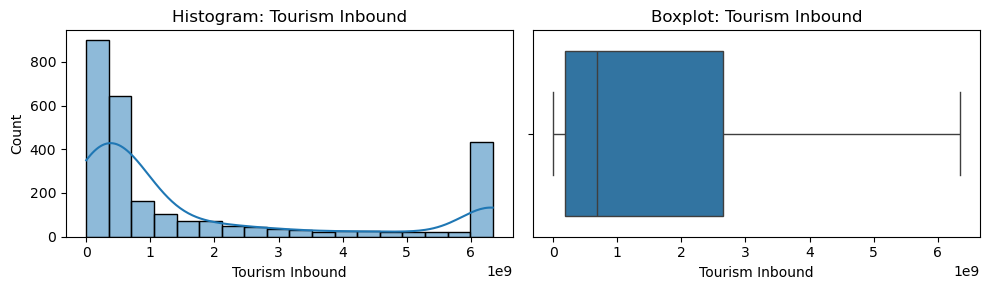

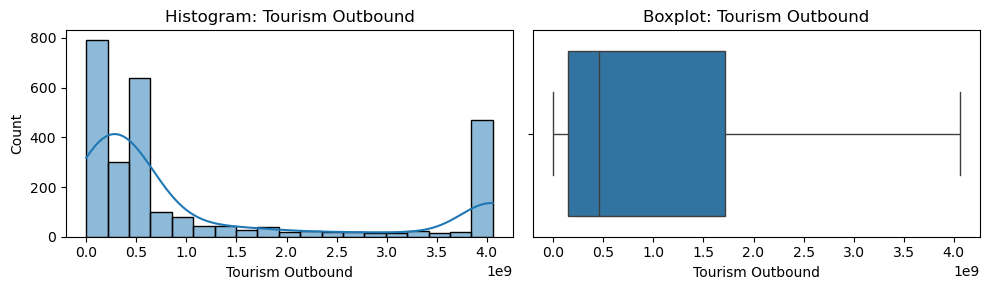

In [43]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)

n = len(num_cols)
if n==0:
    print('No numeric columns detected to plot.')
else:
    for i, col in enumerate(num_cols):
        plt.figure(figsize=(10,3))
        plt.subplot(1,2,1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Histogram: {col}')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col].dropna())
        plt.title(f'Boxplot: {col}')
        plt.tight_layout()
        plt.show()


In [45]:
cat_cols = df_clean.select_dtypes(include=['object','category']).columns.tolist()
print('Categorical columns:', cat_cols)

for c in cat_cols:
    print('\nColumn:', c)
    display(df[c].value_counts(dropna=False).head(20))


Categorical columns: ['Country']

Column: Country


Country
Algeria                 13
Angola                  13
Turkey                  13
Ukraine                 13
United Kingdom          13
Bahrain                 13
Iran, Islamic Rep.      13
Iraq                    13
Israel                  13
Jordan                  13
Kuwait                  13
Lebanon                 13
Oman                    13
Qatar                   13
Saudi Arabia            13
Syrian Arab Republic    13
United Arab Emirates    13
Yemen, Rep.             13
American Samoa          13
Australia               13
Name: count, dtype: int64

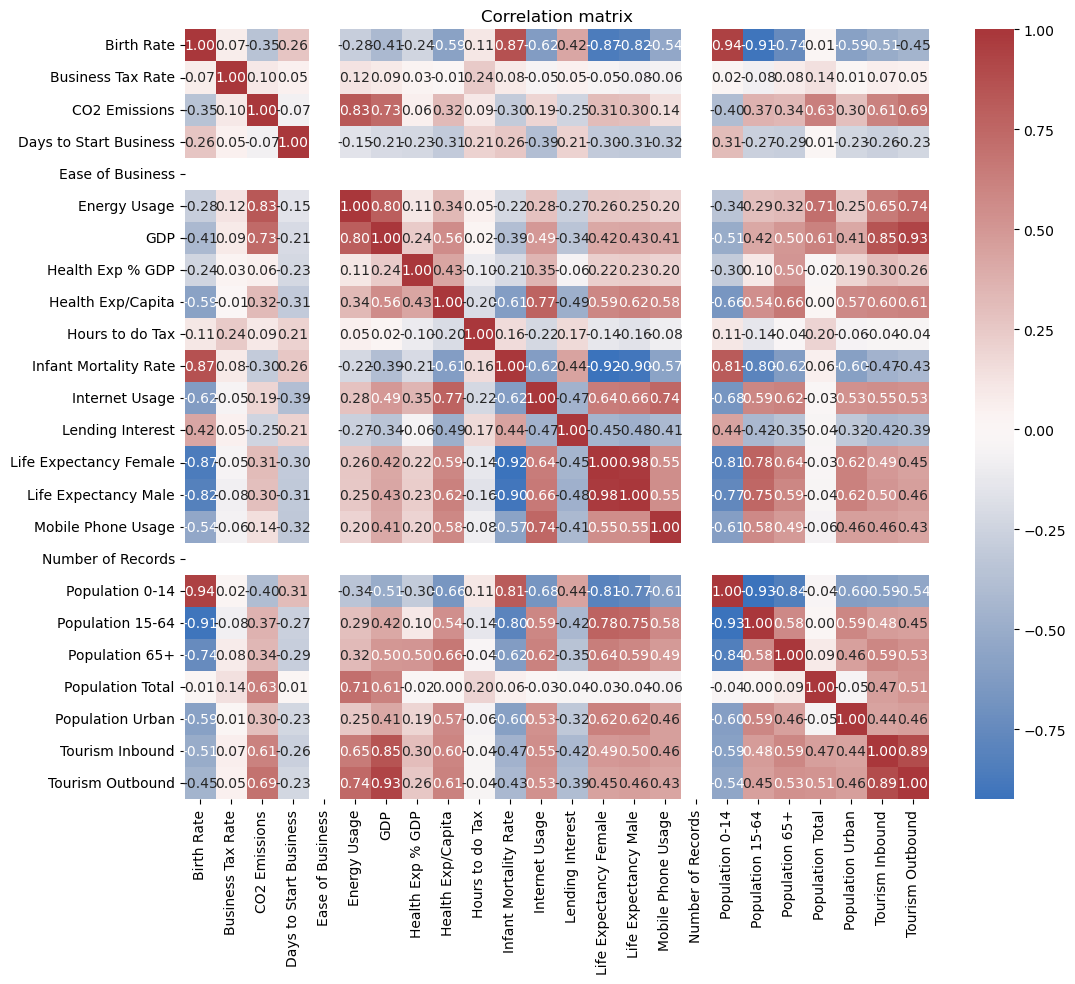

In [47]:
if len(num_cols)>1:
    corr = df_clean[num_cols].corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
    plt.title('Correlation matrix')
    plt.show()
else:
    print('Not enough numeric columns for correlation matrix.')


Detected country-like columns: ['Country']


Country  Birth Rate
243    Niger       0.053
35     Niger       0.053
659    Niger       0.052
451    Niger       0.052
867    Niger       0.052
8       Chad       0.051
1491   Niger       0.051
1283   Niger       0.051
424     Chad       0.051
1075   Niger       0.051
216     Chad       0.051
1048    Chad       0.050
833   Angola       0.050
2115   Niger       0.050
209   Angola       0.050

Country  Birth Rate
478     Hong Kong SAR, China       0.007
686     Hong Kong SAR, China       0.007
894     Hong Kong SAR, China       0.007
270     Hong Kong SAR, China       0.007
1350                 Germany       0.008
2598                 Germany       0.008
318                   Latvia       0.008
1132  Bosnia and Herzegovina       0.008
1319        Macao SAR, China       0.008
903         Macao SAR, China       0.008
1974                 Germany       0.008
133                  Ukraine       0.008
279         Macao SAR, China       0.008
695         Macao SAR, China       0.008
1142                 Germany       0.008

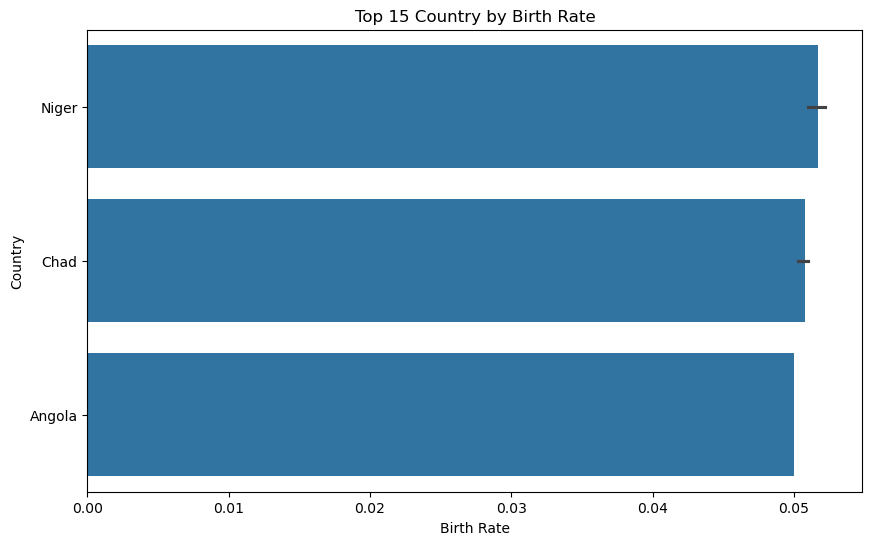

In [51]:
# If there's a Country-like column, compute top/bottom values for key metrics
country_cols = [c for c in df.columns if 'country' in c.lower() or 'nation' in c.lower()]
print('Detected country-like columns:', country_cols)
if country_cols and len(num_cols)>0:
    country_col = country_cols[0]
    metric = num_cols[0]
    tmp = df_clean[[country_col, metric]].dropna()
    top = tmp.sort_values(by=metric, ascending=False).head(15)
    bottom = tmp.sort_values(by=metric, ascending=True).head(15)
    display(top)
    display(bottom)
    plt.figure(figsize=(10,6))
    sns.barplot(data=top, y=country_col, x=metric)
    plt.title(f'Top 15 {country_col} by {metric}')
    plt.show()
else:
    print('No country-like column detected or no numeric columns to rank.')


Possible country columns for map: ['Country']


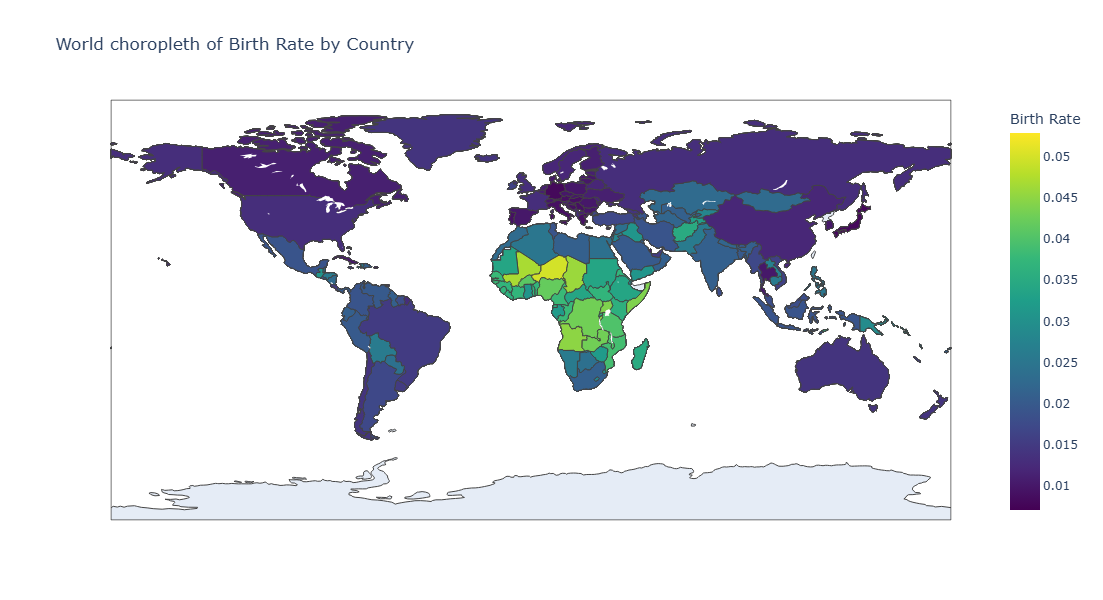

In [57]:
# Choropleth map (Plotly) - requires a country column that matches built-in country names or ISO codes
import plotly.express as px
possible_country_cols = [c for c in df.columns if 'country' in c.lower() or 'nation' in c.lower() or 'iso' in c.lower()]
print('Possible country columns for map:', possible_country_cols)
if possible_country_cols and len(num_cols)>0:
    country_col = possible_country_cols[0]
    metric = num_cols[0]
    map_df = df_clean[[country_col, metric]].dropna()
    fig = px.choropleth(map_df, locations=country_col, locationmode='country names',
                        color=metric, hover_name=country_col,
                        title=f'World choropleth of {metric} by {country_col}',
                        color_continuous_scale='Viridis')
    fig.update_layout(height=600)
    fig.show()
else:
    print('No suitable country column or numeric metric for choropleth map.')
    print('If you want a map, ensure a column with country names or ISO codes exists (e.g., "Country", "ISO3").')